In [ ]:
#Discoveries:

#--Q. Scrapping Stock-Data from Web.
#--Q. Creating a Separtate DataFrame for each Company.
#--Q. Observing 'INFY' Stock Price movement till date i.e 01-07-2021 and plotting it on Graph.
#--Q. Calculating the Moving Averages for 'TTM' Stock and plotting them on as a line Graph.
#--Q. Creating a Stock index that consists of only these 4 companies.
#--Q. Plotting the INDIAN STOCK INDEX.(Avg. movement of all 4 companies mentioned.
#--Q. How the Individual Stocks move in relation to our INDIAN STOCK INDEX.(Observations mentioned below the graph.)
#--Q. Observing the Correlation of our Stocks with a HeatMap with respect to our created (INDIAN STOCK INDEX) and individial co.


In [1]:
import numpy as np 
import pandas as pd
from pandas import DataFrame,Series

In [2]:
import matplotlib as mpl 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# Here is the list of Top 4 Indian Companies listed in United States Stock Market:
# INFY   = Infosys Ltd
# WIT    = Wipro Limited
# TTM    = Tata Motors Limited
# MMYT   = MakeMyTrip Limited

indian_co=['INFY','WIT','TTM','MMYT']

In [4]:
 from datetime import datetime 

In [5]:
# setting dates from when data is needed:
end = datetime(2021,7,1)
start = datetime(end.year,end.month-5,end.day)

# start date is Feb 1 2021 as that was the day when, Indian Budget(2021) was announced. 

In [6]:
from pandas_datareader import data

In [7]:
import pandas_datareader as pdr

In [ ]:
# Scrapping Stock-Data from Web:
# Creating a Separtate DataFrame for each Company. 

for stock in indian_co:
    globals()[stock]=data.DataReader(stock,'yahoo',start,end)

In [9]:
INFY.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
"Feb 01, 2021",17.19,17.42,17.05,17.38,17.20,5829200
"Feb 02, 2021",17.45,17.51,17.34,17.44,17.26,4119800
"Feb 03, 2021",17.60,17.75,17.49,17.65,17.47,4677800
"Feb 04, 2021",17.54,17.64,17.36,17.59,17.41,4439600
"Feb 05, 2021",17.50,17.65,17.39,17.63,17.45,6952900


In [10]:
TTM.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
"Feb 01, 2021",18.77,19.63,18.77,19.52,19.52,3153100
"Feb 02, 2021",21.69,22.28,21.37,22.17,22.17,4969300
"Feb 03, 2021",22.20,22.75,22.19,22.62,22.62,2809900
"Feb 04, 2021",22.20,22.41,21.91,22.31,22.31,1997000
"Feb 05, 2021",21.70,21.72,21.02,21.54,21.54,2182600


<AxesSubplot:xlabel='Date'>

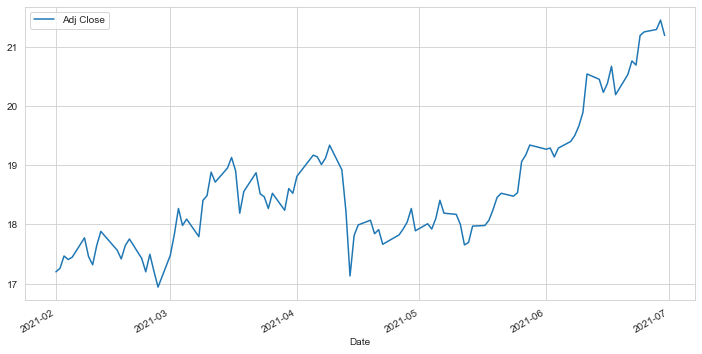

In [105]:
# INFY Stock Price movement till date i.e 01-07-2021. 

INFY['Adj Close'].plot(legend=True,figsize=(12,6))

In [106]:
# Calculating the Moving Average(MA) for TATA Motors Stock:

moving_average=[10,20,50]
for ma in moving_average:
    column_name='MA for %s days' %(str(ma))
    TTM[column_name]=TTM['Adj Close'].rolling(ma).mean()

In [107]:
TTM.head()
# New columns are been Added to the DataFrame.

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2021-02-01,19.629999,18.770000,18.770000,19.520000,3153100,19.520000,NaN,NaN,NaN
2021-02-02,22.280001,21.370001,21.690001,22.170000,4969300,22.170000,NaN,NaN,NaN
2021-02-03,22.750000,22.190001,22.200001,22.620001,2809900,22.620001,NaN,NaN,NaN
2021-02-04,22.410000,21.910000,22.200001,22.309999,1997000,22.309999,NaN,NaN,NaN
2021-02-05,21.719999,21.020000,21.700001,21.540001,2182600,21.540001,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

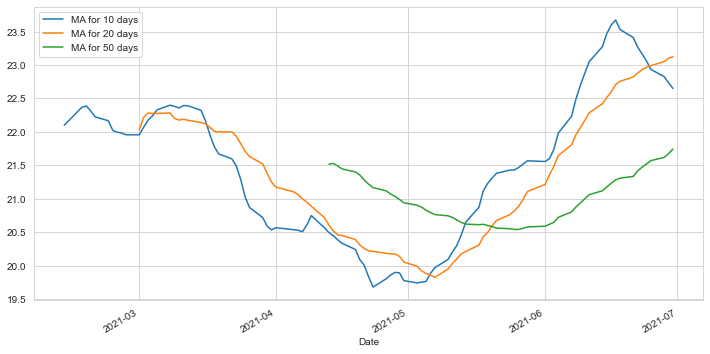

In [108]:
# What the moving Averages look like on a graph :

TTM['MA for 10 days'].plot(legend=True,figsize=(12,6))
TTM['MA for 20 days'].plot(legend=True,figsize=(12,6))
TTM['MA for 50 days'].plot(legend=True,figsize=(12,6))


<AxesSubplot:title={'center':'INDIAN STOCKS'}, xlabel='Date'>

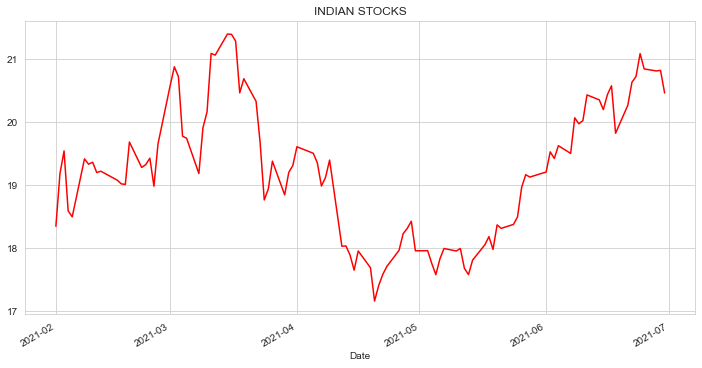

In [109]:
# If There is a Stock index consists of only these 4 companies, how that index would look like:

#Using all Stock Prices in a single DataFrame:
ind_co_df=data.DataReader(indian_co,'yahoo',start,end)['Adj Close']

# Adding all Stock prices to make them a part of our Index:
ind_co_index = ind_co_df.sum(axis=1)/4

#Plotting the INDIAN STOCK INDEX:
ind_co_index.plot(kind='line',figsize=(12,6),title='INDIAN STOCKS',color='red')


(0.0, 40.0)

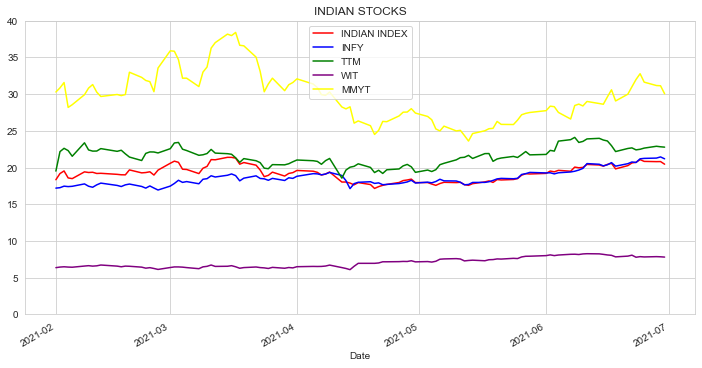

In [110]:
# How the Individual Stocks move in relation to our INDIAN STOCK INDEX:

ind_co_index.plot(kind='line',figsize=(12,6),title='INDIAN STOCKS',color='red',legend=True,label='INDIAN INDEX')
ind_co_df['INFY'].plot(kind='line',figsize=(12,6),color='blue',legend=True)
ind_co_df['TTM'].plot(kind='line',figsize=(12,6),color='green',legend=True)
ind_co_df['WIT'].plot(kind='line',figsize=(12,6),color='purple',legend=True)
ind_co_df['MMYT'].plot(kind='line',figsize=(12,6),color='yellow',legend=True)
plt.ylim(0,40)

In [111]:
# As by Observaton of the Graph it can be said that:
# INFY has the most amount of impact on our Indian Stock Index. 
# TTM aka TATA Motors is second most index friendly Stock. 
# Whereas it Seems that WIT aka Wipro Ltd. is not impacted by overall Stock market Change.

In [121]:
# IT can verified that the assumptions we are making are True or not with a More Accurate Graph:

# StockIndex should be added to the DataFrame containing Stock Info:
ind_index_df = DataFrame(data=ind_co_index,columns=['INDEX PRICE'])
ind_co_df = ind_co_df.merge(ind_index_df,left_index=True,right_index=True)

In [122]:
ind_co_df

,INFY,WIT,TTM,MMYT,INDEX PRICE
Date,,,,,
2021-02-01,17.200546,6.37,19.520000,30.290001,18.345137
2021-02-02,17.259928,6.45,22.170000,30.850000,19.182482
2021-02-03,17.467758,6.49,22.620001,31.580000,19.539440
2021-02-04,17.408379,6.45,22.309999,28.190001,18.589595
2021-02-05,17.447966,6.43,21.540001,28.559999,18.494491
...,...,...,...,...,...
2021-06-24,21.190001,7.87,22.490000,32.779999,21.082500
2021-06-25,21.250000,7.83,22.650000,31.629999,20.840000
2021-06-28,21.290001,7.87,22.900000,31.170000,20.807500


<AxesSubplot:>

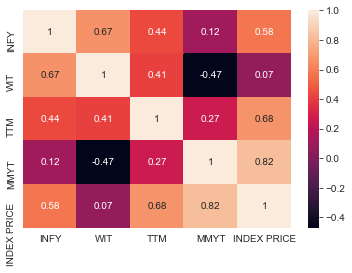

In [123]:
# Checking the Correlation of our Stocks with a HeatMap:
sns.heatmap(ind_co_df.corr(),annot=True)

In [125]:
# Looks like I made a Wrong Assumption the most correlated Stock to our index is MMYT aka MakeMyTrip not INFY.
# Although my assumption about WIT was correct as it turns out to be the most least related Stock to our Index. 

# Other important Observations:
# Looks like MMYT and WIT have a Negative Correlation that means if one goes up the other goes down. 
# Looks like WIT and INFY have a pretty good relation, well it can assumed as they both are Tech Companies. 